### **Part 1: Introduction**

This project uses UK Pariament speeches from 1997 to 2019.

The goal of this project is to use Natural Language Technology to predict the political party based on the content of their speeches.

In [1]:
import pandas as pd

Mount Google Drive to Read in the files.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Choose the local or google file path depending on how you are running the notebook.

In [3]:
# df = pd.read_csv("/content/drive/MyDrive/CA4023/ParlVote+.csv")
df = pd.read_csv("../data/ParlVote+.csv")

Overview of the dataset.

In [4]:
df.dtypes

debate_id               object
motion_speaker_id        int64
motion_speaker_name     object
motion_party            object
debate_title            object
motion_text             object
policy_preference      float64
speaker_id             float64
speaker_name            object
party                   object
vote                     int64
speech                  object
dtype: object

In [5]:
display(df)

,debate_id,motion_speaker_id,motion_speaker_name,motion_party,debate_title,motion_text,policy_preference,speaker_id,speaker_name,party,vote,speech
0,1997-05-19a.379.7,10394,"Maclean, David",conservative,Orders of the Day — Home Affairs,I beg to move as an amendment to the Address t...,305.1,10105.0,"Clapham, Michael",labour,0,The right hon Gentleman has recited a catalogu...
1,1997-05-19a.379.7,10394,"Maclean, David",conservative,Orders of the Day — Home Affairs,I beg to move as an amendment to the Address t...,305.1,10556.0,"Soley, Clive",labour,0,I am not sure whether this has occurred to the...
2,1997-05-19a.379.7,10394,"Maclean, David",conservative,Orders of the Day — Home Affairs,I beg to move as an amendment to the Address t...,305.1,10138.0,"Cox, Tom",labour,0,Before the right hon Gentleman leaves the subj...
3,1997-05-19a.379.7,10394,"Maclean, David",conservative,Orders of the Day — Home Affairs,I beg to move as an amendment to the Address t...,305.1,10574.0,"Straw, Jack",labour,0,I thank the right hon Member for Penrith and T...
4,1997-05-19a.379.7,10394,"Maclean, David",conservative,Orders of the Day — Home Affairs,I beg to move as an amendment to the Address t...,305.1,10239.0,"Grant, Bernie",labour,0,I thank my right hon Friend for giving way and...
...,...,...,...,...,...,...,...,...,...,...,...,...
33306,2019-10-29b.290.3,25432,"Smith, Cat",labour,Early parliamentary general election,"I beg to move amendment 2, page 1, line 2, lea...",0.0,25361.0,"Blackford, Ian",scottish-national-party,1,I should point out to the hon Gentleman that E...
33307,2019-10-29b.290.3,25432,"Smith, Cat",labour,Early parliamentary general election,"I beg to move amendment 2, page 1, line 2, lea...",0.0,10354.0,"Leslie, Chris",independent,1,"On a point of order, Madam Deputy Speaker. I w..."
33308,2019-10-29b.290.3,25432,"Smith, Cat",labour,Early parliamentary general election,"I beg to move amendment 2, page 1, line 2, lea...",0.0,25302.0,"Saville-Roberts, Liz",plaid-cymru,1,"On a point of order, Mr Speaker. Today’s vote ..."
33309,2019-10-29b.290.3,25432,"Smith, Cat",labour,Early parliamentary general election,"I beg to move amendment 2, page 1, line 2, lea...",0.0,24772.0,"Soubry, Anna",independent,1,"On a point of order, Mr Speaker. I know that ..."


In [6]:
df['party'].unique()

array(['labour', 'labourco-operative', 'scottish-national-party',
       'conservative', 'liberal-democrat', 'plaid-cymru', 'uup',
       'social-democratic-and-labour-party', 'independent', 'dup',
       'independent-conservative', 'independent-ulster-unionist',
       'respect', 'ukip', 'green', 'alliance'], dtype=object)

Show the speech counts of each party

In [7]:
party_counts = df['party'].value_counts()
print(party_counts)

party
conservative                          13499
labour                                13096
liberal-democrat                       2858
scottish-national-party                1428
labourco-operative                      782
dup                                     578
plaid-cymru                             336
independent                             229
social-democratic-and-labour-party      189
uup                                     154
green                                   115
ukip                                     14
alliance                                 13
independent-ulster-unionist               9
respect                                   6
independent-conservative                  5
Name: count, dtype: int64


The number of words in the speech field.

In [8]:
df['speech'].apply(lambda x: len(x.split(' '))).sum()

22670483

In [9]:
import numpy as np

### **Part: 2 Baseline Solution**

Before we can test the various approaches the data needs to be cleaned.

For the baseline I will make the text lowercase, remove stopwords and punctuation.

I also have removed common parliamentary words as they appear frequently across all parties.

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import string
#from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\FX
[nltk_data]     8320\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\FX
[nltk_data]     8320\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\FX
[nltk_data]     8320\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
stop_words = set(stopwords.words('english'))

# Remove common parliamentary terms
parliamentay_stop_words = {"hon", "would", "people", "member", "right", "friend", "bill", "house", "government", "minister", "gentleman", "lady", "mr", "speaker", "one", "members", "said", "many", "made", "time", "want", "us", "“", "”", "’"}

updated_stop_words = stop_words.union(parliamentay_stop_words)
punctuation_translation = str.maketrans('', '', string.punctuation)

def clean_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing Punctuation
    text = text.translate(punctuation_translation)

    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing Stopwords
    tokens = [word for word in tokens if word not in updated_stop_words]

    return tokens

In [12]:
# Apply the cleaning function to the 'speech' column
df['cleaned_speech'] = df['speech'].apply(lambda x: clean_text(x))

In [13]:
display(df['cleaned_speech'])

0        [recited, catalogue, two, thirds, current, cri...
1        [sure, whether, occurred, late, win, last, gen...
2        [leaves, subject, prison, tell, whether, read,...
3        [thank, penrith, border, generosity, congratul...
4        [thank, giving, way, congratulate, appointment...
                               ...                        
33306    [point, eu, nationals, given, vote, scottish, ...
33307    [point, order, madam, deputy, hoping, move, ma...
33308    [point, order, today, vote, lays, precedents, ...
33309    [point, order, know, sometimes, uncomfortable,...
33310    [point, order, three, half, years, liberal, de...
Name: cleaned_speech, Length: 33311, dtype: object

The baseline will look at the word frequency of the words used in speeches by each party.

Create a test set that can be used to validate the various approaches.

As the classes are imbalanced stratified sampling is used to ensure that class frequencies are preserved

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Use stratified sampling to split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=62, stratify=df['party'])


### Count Based Approach

The frequencies will be calculated from the training set so that the results will be fair.

In [16]:
from collections import Counter

Find the most common words said in speeches by each party.

In [17]:
# Group by party
grouped_by_party = train_df.groupby('party')

In [18]:
# Initialise counters for each party
counters = {party: Counter() for party in df['party'].unique()}

# Count occurrences of each word in each party's subset
for party, group in grouped_by_party:
    for tokenized_text in group['cleaned_speech']:
        counters[party].update(tokenized_text)

In [19]:
# Display the most common words for each party
for party, counter in counters.items():
    print(party, counter.most_common(100))

labour [('new', 10083), ('work', 9993), ('need', 9813), ('make', 9799), ('could', 9463), ('local', 9415), ('point', 9200), ('say', 8973), ('also', 8893), ('years', 8735), ('way', 8622), ('debate', 8523), ('support', 8127), ('secretary', 7894), ('know', 7873), ('tax', 7862), ('committee', 7636), ('state', 7624), ('think', 7590), ('public', 7535), ('get', 7534), ('take', 7517), ('country', 7351), ('however', 7059), ('important', 6952), ('must', 6736), ('may', 6422), ('year', 6362), ('much', 6272), ('whether', 6226), ('amendment', 6144), ('issue', 6079), ('system', 5930), ('place', 5854), ('two', 5762), ('labour', 5724), ('go', 5653), ('put', 5634), ('good', 5614), ('agree', 5580), ('first', 5527), ('hope', 5416), ('well', 5395), ('clause', 5325), ('even', 5281), ('back', 5234), ('parliament', 5227), ('see', 5189), ('number', 5123), ('might', 5105), ('money', 5074), ('case', 5041), ('children', 5008), ('like', 4993), ('believe', 4946), ('last', 4946), ('clear', 4917), ('today', 4912), ('p

Create a set of the top n words for each party.

In [20]:
def create_top_words_sets(counters, n):
    return {party: set(word for word, _ in counter.most_common(n)) for party, counter in counters.items()}

Compare each speech with the top words of each party.

1 point will be added to the party's score every time one of their top n words appears in a speech.

The party with the highest score is predicted.

In [21]:
def predict_party_based_on_top_n_phrases(tokenized_speech, top_words_sets):
    
    # Add 1 if the word appears in the party's top words
    party_scores = {party: sum(1 for word in tokenized_speech if word in top_words_set) for party, top_words_set in top_words_sets.items()}

    predicted_party = max(party_scores, key=party_scores.get)
    return predicted_party

Apply this to the test dataset based on the top n words.

In [22]:
top_words_sets = create_top_words_sets(counters, 8000)
test_df['predicted_party'] = test_df['cleaned_speech'].apply(lambda x: predict_party_based_on_top_n_phrases(x, top_words_sets))

Test the predictions using a variety of metrics.

In [23]:
from sklearn.metrics import accuracy_score, classification_report

Weighted precision, recall and F1-score can be used to account for the label imbalance in the dataset.

Each class's recall is the same as their accuracy.

In [24]:
def calculate_metrics(y_test, y_pred):

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y_test, y_pred)
    print(f"Overall Accuracy: {overall_accuracy}\n")

    # Calculate precision, recall, and F1-score for each class
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

In [25]:
calculate_metrics(test_df['party'], test_df['predicted_party'])

Overall Accuracy: 0.39006453549452197


Classification Report:
                                    precision    recall  f1-score   support

                          alliance       0.00      0.00      0.00         2
                      conservative       0.56      0.30      0.39      2700
                               dup       0.14      0.09      0.11       116
                             green       0.11      0.09      0.10        23
                       independent       0.08      0.02      0.03        46
          independent-conservative       0.00      0.00      0.00         1
       independent-ulster-unionist       0.00      0.00      0.00         2
                            labour       0.46      0.59      0.52      2619
                labourco-operative       0.04      0.11      0.06       156
                  liberal-democrat       0.15      0.18      0.16       572
                       plaid-cymru       0.02      0.01      0.02        67
                        

c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### Tf-Idf

Try this again using TF-IDF scores instead of counts.

Summing the Tf-Idf scores will give a rough measure of how important the word is to the party.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
# Initialise counters for each party
tfidf_counters = {party: Counter() for party in train_df['party'].unique()}

# Calculate TF-IDF scores for each party's subset
for party, group in grouped_by_party:

    # Initialise a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    
    # Concatenate tokenized speeches into a list of speeches
    party_corpus = [' '.join(tokenized_text) for tokenized_text in group['cleaned_speech']]
    
    # Calculate TF-IDF scores for each speech in the party's subset
    tfidf_matrix = vectorizer.fit_transform(party_corpus)
    
    # Get the words from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    # Extract and add TF-IDF scores for each word in the party's corpus
    for _, tfidf_scores in enumerate(tfidf_matrix.toarray()):
        tfidf_counters[party].update(dict(zip(feature_names, tfidf_scores)))

If this takes too long to run you can load the saved Tf-Idf scores using the following code.

In [28]:
# import pickle

# with open('./Tf-Idf_Scores_By_Party.pkl', 'rb') as file:
#     tfidf_counters = pickle.load(file)

In [29]:
for party, tfidf_counter in tfidf_counters.items():
    print(party, tfidf_counter.most_common(100))

labour [('local', 172.0251572014805), ('tax', 167.4133000423334), ('work', 166.53425772085058), ('agree', 166.17807750842098), ('point', 160.31041445748846), ('secretary', 158.9731962180649), ('new', 147.16479204715054), ('state', 146.48657964004948), ('could', 146.41734188413957), ('need', 146.11266033847448), ('committee', 143.21938469622523), ('say', 142.25761849413666), ('way', 140.464426855388), ('debate', 139.3313107047163), ('make', 138.985802063776), ('country', 137.48710504208088), ('years', 136.95749970185497), ('support', 136.1249779455022), ('get', 133.13190760493572), ('public', 129.64289746805468), ('think', 129.06544735875977), ('know', 127.01916291951801), ('also', 127.00990983637456), ('police', 121.3668049949607), ('children', 121.03147779797145), ('amendment', 120.19636003207137), ('take', 119.92816419972478), ('constituency', 117.54540122290865), ('important', 115.6232609691568), ('labour', 115.195560898972), ('may', 114.09516333190803), ('whether', 113.303171150257

In [30]:
tfidf_top_words_sets = create_top_words_sets(tfidf_counters, 8000)
test_df['predicted_party'] = test_df['cleaned_speech'].apply(lambda x: predict_party_based_on_top_n_phrases(x, tfidf_top_words_sets))
calculate_metrics(test_df['party'], test_df['predicted_party'])

Overall Accuracy: 0.4085246885787183


Classification Report:
                                    precision    recall  f1-score   support

                          alliance       0.00      0.00      0.00         2
                      conservative       0.54      0.34      0.42      2700
                               dup       0.16      0.16      0.16       116
                             green       0.07      0.09      0.08        23
                       independent       0.12      0.02      0.04        46
          independent-conservative       0.00      0.00      0.00         1
       independent-ulster-unionist       0.00      0.00      0.00         2
                            labour       0.45      0.60      0.52      2619
                labourco-operative       0.08      0.07      0.07       156
                  liberal-democrat       0.15      0.18      0.16       572
                       plaid-cymru       0.06      0.06      0.06        67
                         

c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [31]:
calculate_metrics(test_df['party'], test_df['predicted_party'])

Overall Accuracy: 0.4085246885787183


Classification Report:
                                    precision    recall  f1-score   support

                          alliance       0.00      0.00      0.00         2
                      conservative       0.54      0.34      0.42      2700
                               dup       0.16      0.16      0.16       116
                             green       0.07      0.09      0.08        23
                       independent       0.12      0.02      0.04        46
          independent-conservative       0.00      0.00      0.00         1
       independent-ulster-unionist       0.00      0.00      0.00         2
                            labour       0.45      0.60      0.52      2619
                labourco-operative       0.08      0.07      0.07       156
                  liberal-democrat       0.15      0.18      0.16       572
                       plaid-cymru       0.06      0.06      0.06        67
                         

c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Create a plot of n against accuracy and f1 score.

In [32]:
from sklearn.metrics import f1_score

chosen_n = []
accuracy = []
macro_f1_score = []
weighted_f1_score = []

# Calculate metrics in range of chosen top words
for n in range(10, 12100, 100):
    chosen_n.append(n)
    tfidf_top_words_sets = create_top_words_sets(tfidf_counters, n)
    test_df['predicted_party'] = test_df['cleaned_speech'].apply(lambda x: predict_party_based_on_top_n_phrases(x, tfidf_top_words_sets))
    accuracy.append(accuracy_score(test_df['party'], test_df['predicted_party']))
    macro_f1_score.append(f1_score(test_df['party'], test_df['predicted_party'], average="macro"))
    weighted_f1_score.append(f1_score(test_df['party'], test_df['predicted_party'], average="weighted"))

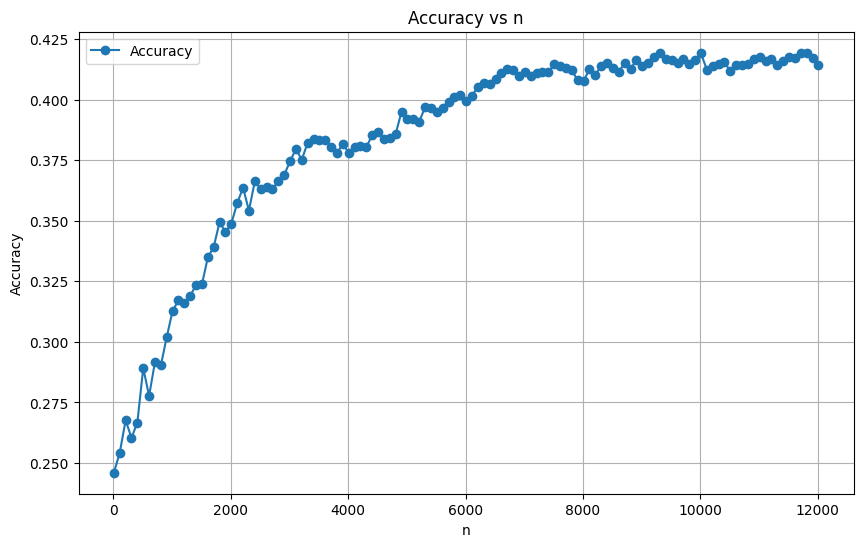

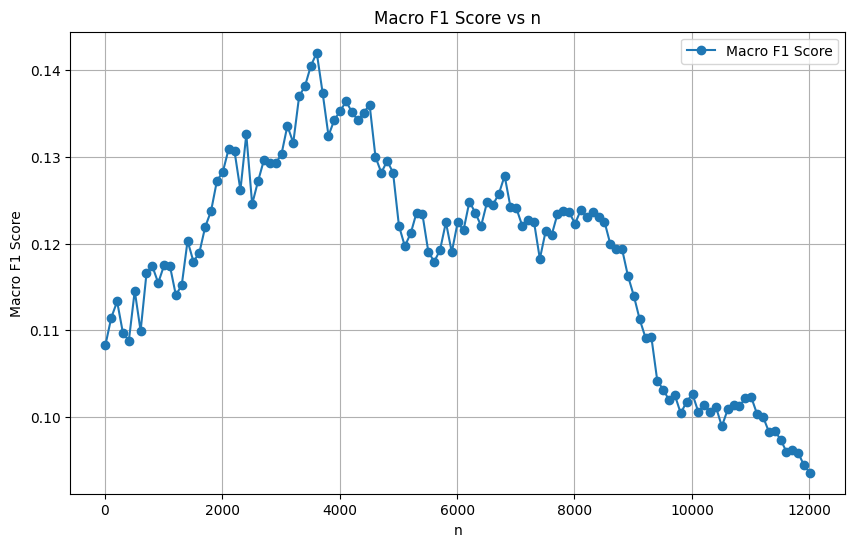

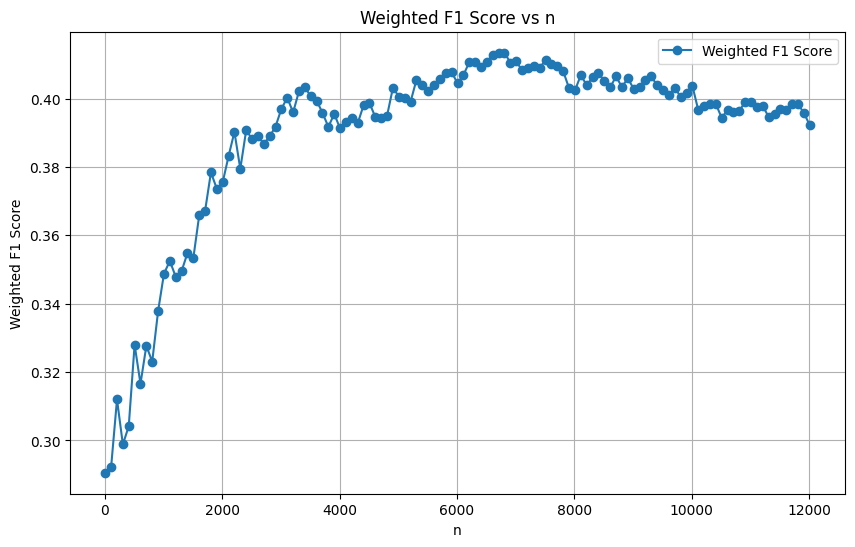

In [33]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(chosen_n, accuracy, label='Accuracy', marker='o')
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Macro F1 Score
plt.figure(figsize=(10, 6))
plt.plot(chosen_n, macro_f1_score, label='Macro F1 Score', marker='o')
plt.xlabel('n')
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 Score vs n')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Weighted F1 Score
plt.figure(figsize=(10, 6))
plt.plot(chosen_n, weighted_f1_score, label='Weighted F1 Score', marker='o')
plt.xlabel('n')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score vs n')
plt.legend()
plt.grid(True)
plt.show()

Tf-Idf treating every speech by a party as one document.

In [34]:
# Combine speeches for each party into a super document
super_documents = {party: ' '.join([' '.join(tokenized_text) for tokenized_text in group['cleaned_speech']]) 
                   for party, group in grouped_by_party}

# Initialise a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Initialise counters for each party
super_tfidf_counters = {party: Counter() for party in super_documents.keys()}

# Calculate TF-IDF scores for each party's super document
for party, super_doc in super_documents.items():
    # Calculate TF-IDF scores for the party's super document
    super_tfidf_matrix = vectorizer.fit_transform([super_doc])

    # Get the words from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Extract and update TF-IDF scores for the party
    super_tfidf_counters[party].update(dict(zip(feature_names, super_tfidf_matrix.toarray()[0])))

In [35]:
for party, super_tfidf_counter in super_tfidf_counters.items():
    print(party, super_tfidf_counter.most_common(100))

alliance [('ireland', 0.4635843106166202), ('northern', 0.4521377844285555), ('elections', 0.1659746297269381), ('however', 0.14880484044484105), ('impact', 0.13735831425677636), ('issue', 0.13735831425677636), ('support', 0.11446526188064697), ('uk', 0.11446526188064697), ('justice', 0.10874199878661461), ('important', 0.10301873569258227), ('may', 0.10301873569258227), ('also', 0.09729547259854993), ('debate', 0.09729547259854993), ('evidence', 0.09157220950451757), ('given', 0.09157220950451757), ('back', 0.08584894641048522), ('eaw', 0.08584894641048522), ('system', 0.08584894641048522), ('agree', 0.08012568331645288), ('day', 0.08012568331645288), ('opt', 0.08012568331645288), ('significant', 0.08012568331645288), ('simply', 0.08012568331645288), ('fees', 0.07440242022242052), ('wish', 0.07440242022242052), ('concerns', 0.06867915712838818), ('election', 0.06867915712838818), ('local', 0.06867915712838818), ('matter', 0.06867915712838818), ('much', 0.06867915712838818), ('change',

In [36]:
super_tfidf_top_words_sets = create_top_words_sets(super_tfidf_counters, 8000)
test_df['predicted_party'] = test_df['cleaned_speech'].apply(lambda x: predict_party_based_on_top_n_phrases(x, super_tfidf_top_words_sets))

In [37]:
calculate_metrics(test_df['party'], test_df['predicted_party'])

Overall Accuracy: 0.4047726249437191


Classification Report:
                                    precision    recall  f1-score   support

                          alliance       0.00      0.00      0.00         2
                      conservative       0.49      0.62      0.54      2700
                               dup       0.12      0.20      0.15       116
                             green       0.04      0.09      0.06        23
                       independent       0.04      0.02      0.03        46
          independent-conservative       0.00      0.00      0.00         1
       independent-ulster-unionist       0.00      0.00      0.00         2
                            labour       0.54      0.30      0.39      2619
                labourco-operative       0.07      0.13      0.09       156
                  liberal-democrat       0.15      0.18      0.16       572
                       plaid-cymru       0.05      0.04      0.05        67
                         

c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### ChatGPT Comparison

In [38]:
chatgpt_samples = pd.read_csv("../data/chatgpt_samples.csv")

In [39]:
print(chatgpt_samples)

    Unnamed: 0                                             speech  \
0         4464  The hon Gentleman will appreciate that we have...   
1         3651  I should say at the outset that I sympathise w...   
2        12953  With this it will be convenient to discuss the...   
3        30800  Can the Secretary of State confirm that amendm...   
4        13062  Would that not require the Prime Minister and ...   
5        14216  Widespread concern has been expressed througho...   
6        22960  On the number of front-line police officers, w...   
7        31926  I want to find out what has changed since the ...   
8        14462  Would the Minister not agree that the logic of...   
9        24588  On a point of order, Madam Deputy Speaker. The...   
10       14878  It is interesting that the right hon Gentleman...   
11       29761  Further to that point of order, Mr Speaker. It...   
12        3861  The arguments are well trodden. They were made...   
13         927  I start by congrat

Use the cleaning function

In [40]:
chatgpt_samples['cleaned_speech'] = chatgpt_samples['speech'].apply(lambda x: clean_text(x))

Predict the party based on the top 8000 summed Tf-Idf scores.

In [41]:
tfidf_top_words_sets = create_top_words_sets(tfidf_counters, 8000)
chatgpt_samples['predicted_party'] = chatgpt_samples['cleaned_speech'].apply(lambda x: predict_party_based_on_top_n_phrases(x, tfidf_top_words_sets))
calculate_metrics(chatgpt_samples['party'], chatgpt_samples['predicted_party'])

Overall Accuracy: 0.2


Classification Report:
                                    precision    recall  f1-score   support

                      conservative       0.18      0.29      0.22         7
                               dup       0.00      0.00      0.00         1
                            labour       0.29      0.18      0.22        11
                labourco-operative       0.00      0.00      0.00         3
                  liberal-democrat       0.22      0.33      0.27         6
                       plaid-cymru       0.00      0.00      0.00         1
           scottish-national-party       0.00      0.00      0.00         1
social-democratic-and-labour-party       0.00      0.00      0.00         0
                               uup       0.00      0.00      0.00         0

                          accuracy                           0.20        30
                         macro avg       0.08      0.09      0.08        30
                      weighted avg     

c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

Other values of n can be more accurate.

In [42]:
tfidf_top_words_sets = create_top_words_sets(tfidf_counters, 500)
chatgpt_samples['predicted_party'] = chatgpt_samples['cleaned_speech'].apply(lambda x: predict_party_based_on_top_n_phrases(x, tfidf_top_words_sets))
calculate_metrics(chatgpt_samples['party'], chatgpt_samples['predicted_party'])

Overall Accuracy: 0.3333333333333333


Classification Report:
                                    precision    recall  f1-score   support

                      conservative       0.50      0.14      0.22         7
                               dup       0.00      0.00      0.00         1
                             green       0.00      0.00      0.00         0
                       independent       0.00      0.00      0.00         0
                            labour       0.75      0.27      0.40        11
                labourco-operative       0.00      0.00      0.00         3
                  liberal-democrat       0.45      0.83      0.59         6
                       plaid-cymru       0.00      0.00      0.00         1
           scottish-national-party       0.50      1.00      0.67         1
social-democratic-and-labour-party       0.00      0.00      0.00         0
                              ukip       0.00      0.00      0.00         0

                        

c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FX 8320\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m